# WeatherAPI

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [42]:
# Testing the data frame
cities[0]

'port-aux-francais'

In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Test response
response = requests.get(query_url + "port-aux-francais").json()
response

{'coord': {'lon': 70.2167, 'lat': -49.35},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 35.17,
  'feels_like': 22.57,
  'temp_min': 35.17,
  'temp_max': 35.17,
  'pressure': 977,
  'humidity': 48,
  'sea_level': 977,
  'grnd_level': 976},
 'visibility': 10000,
 'wind': {'speed': 33.24, 'deg': 272, 'gust': 42.97},
 'clouds': {'all': 62},
 'dt': 1689894713,
 'sys': {'country': 'TF', 'sunrise': 1689908578, 'sunset': 1689940061},
 'timezone': 18000,
 'id': 1546102,
 'name': 'Port-aux-Français',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [6]:
#Performing a weather check using series of API calls, delayed 1 second apart to ensure within free API plan
# Printing a list of city names as they are processed

city_names = []
lat = []
lng = []
temp_max = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []


for city in cities:
    try:    
        response = requests.get(query_url + city).json()
        city_names.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(city)
        time.sleep(1)
    except:
        print(f"{city} not found")
        continue

petropavlovsk-kamchatsky
waitangi
ribeira grande
georgetown
corcoran
broken hill
nar'yan-mar
james island not found
labrador city
san antonio de pale
omutinskiy
invercargill
homer
crane
bilibino
volkovysk
adamstown
la passe
horta
margaret river
enewetak
pacific grove
sitka
port mathurin
puerto natales
oban
kurumkan
acapulco de juarez
ilulissat
kosh-agach
punta arenas
slave lake
bredasdorp
korets
aykhal
macheng
mata-utu
uturoa
saint-joseph
borkum
hawaiian paradise park
port-aux-francais
albany
rabo de peixe
stanley
kapuskasing
grytviken
atafu village
alo
kalifornsky
hithadhoo
mount gambier
thompson
puerto armuelles
yangor not found
sao joao da barra
blackmans bay
hadibu
chulakkurgan
merowe
talnakh
yellowknife
edinburgh of the seven seas
fale old settlement
hermanus
lebu
west island
ushuaia
iqaluit
nagqu
severo-yeniseyskiy
ambon
chibougamau
avarua
buritis
tiksi
taoudenni
hilo
zhezqazghan
isafjordur
yashikira
bafoulabe
acarau
devinuwara not found
hastings
touros
keflavik
callao
svetlyy
aa

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Creating dictionary of columns and making them a data frame

weather_dict = {
    "city": city_names,
    "lat": lat,
    "lng": lng,
    "max temp" : temp_max,
    "humidity" : humidity,
    "cloudiness" : cloudiness,
    "wind_speed" : wind_speed,
    "country" : country,
    "date" : date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,lng,max temp,humidity,cloudiness,wind_speed,country,date
0,Petropavlovsk-Kamchatskiy,53.0452,158.6483,55.99,94,75,2.24,RU,1689894723
1,Waitangi,-43.9535,-176.5597,45.82,94,85,3.00,NZ,1689894527
2,Ribeira Grande,38.5167,-28.7000,72.00,88,40,5.99,PT,1689894725
3,George Town,5.4112,100.3354,82.33,83,20,5.75,MY,1689894696
4,Corcoran,36.0980,-119.5604,102.34,9,0,7.61,US,1689894608


In [50]:
weather_data.describe

<bound method NDFrame.describe of                   city      lat       lng  max temp  humidity  cloudiness  \
0    Port-aux-Français -49.3500   70.2167     37.38        72          69   
1      Arraial do Cabo -22.9661  -42.0278     70.36        89         100   
2        Atafu Village  -8.5421 -172.5159     82.76        76         100   
3         Longyearbyen  78.2186   15.6401     46.24        81          75   
4                 Lebu -37.6167  -73.6500     51.15        82         100   
..                 ...      ...       ...       ...       ...         ...   
554         Indre Arna  60.4247    5.4764     53.65         1         100   
555       Medicine Hat  50.0501 -110.6683     76.19        34          20   
556          Jalai Nur  49.4500  117.7000     73.26        52         100   
557         Masaya Sur  16.4970  121.7456     84.67        73           8   
558        Trincomalee   8.5711   81.2335     81.97        75         100   

     wind_speed country        date  
0  

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Removing the cities that have humidity over 100%
weather_data.loc[weather_data['humidity'] < 100]

,city,lat,lng,max temp,humidity,cloudiness,wind_speed,country,date
0,Petropavlovsk-Kamchatskiy,53.0452,158.6483,55.99,94,75,2.24,RU,1689894723
1,Waitangi,-43.9535,-176.5597,45.82,94,85,3.00,NZ,1689894527
2,Ribeira Grande,38.5167,-28.7000,72.00,88,40,5.99,PT,1689894725
3,George Town,5.4112,100.3354,82.33,83,20,5.75,MY,1689894696
4,Corcoran,36.0980,-119.5604,102.34,9,0,7.61,US,1689894608
...,...,...,...,...,...,...,...,...,...
575,Boa Vista,2.8197,-60.6733,87.78,58,20,4.61,BR,1689895478
576,Nanchong,30.7951,106.0847,75.69,95,99,1.07,CN,1689895479
577,Coalinga,36.1397,-120.3602,100.65,11,0,2.35,US,1689895480
578,Calvinia,-31.4707,19.7760,39.25,63,0,10.00,ZA,1689895482


## Plotting the Data

## Latitude vs. Temperature Plot

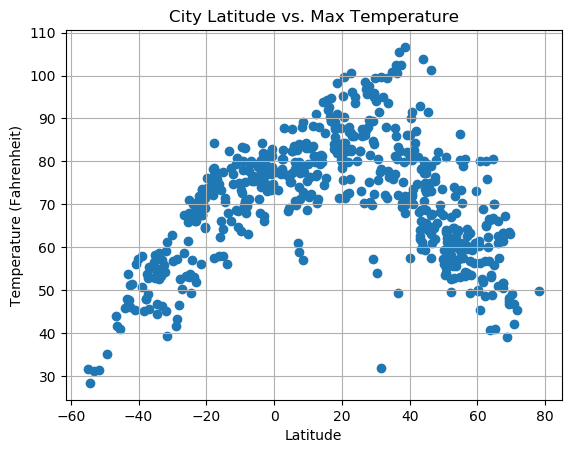

In [32]:
# Creating Scatter plot
plt.scatter(weather_data["lat"], weather_data["max temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('LatVsTemp.png', dpi='figure', format='png')

## Explanation:
* This scatter plot makes an interesting horseshoe shape. It's not on that would yield a helpful linear regression, but it still makes sense that the locations closer to the equator have higher temperature while the temperatures lower as the locations increase distance from the equator towards the cold poles.

## Latitude vs. Humidity Plot

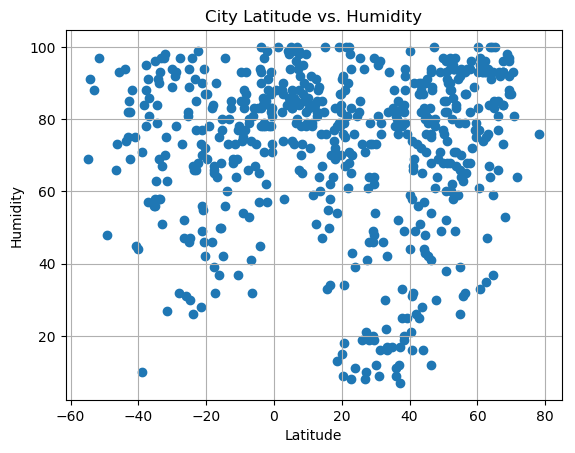

In [33]:
# Creating Scatter plot
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('LatVsHum.png', dpi='figure', format='png')

## Explanation:
* This scatter plot demonstrates that  humidity is not perfectly correlated to latitude, as humidity can be plentifully present throughout the world, though a large mass of high humidity dots are found near the equator

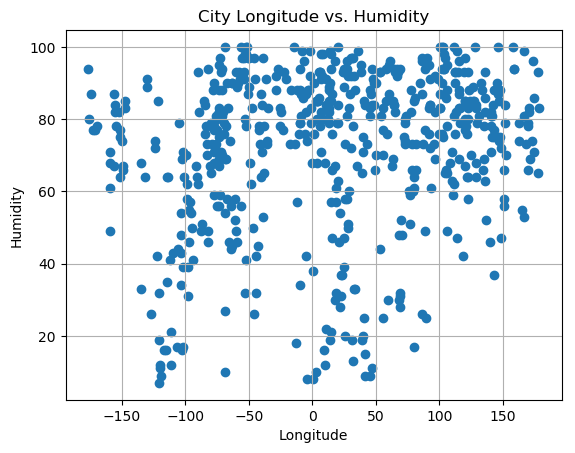

In [34]:
# Creating Scatter plot
plt.scatter(weather_data["lng"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Longitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Longitude")
plt.grid(True)

plt.savefig('LngVsHum.png', dpi='figure', format='png')

## Explanation:
* Since Latitude didn't seem to have much bearing on humidity I decided to test it against Longitude. That yielded very similar results, which is curious, but the explanation might be that Latitudinal and Longitudinal positiong of a city don't seem to have much influence on the humidity of a locale. It would be interesting to measure how humidity correlates with "distance from a coast" or "height of a city".

## Latitude vs. Cloudiness Plot

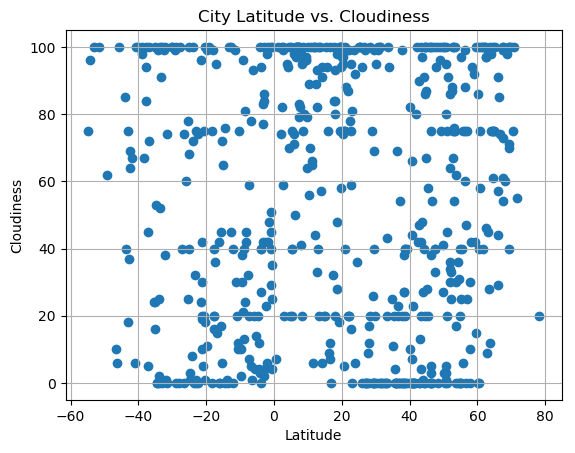

In [35]:
# Creating Scatter plot
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('LatVsCloud.png', dpi='figure', format='png')

## Explanation:
* This scatter plot initially doesn't look like it tells much of a story, but upon closer inspection it can be noticed that the locations near the equator experience a higher average of high cloudiness, with only one dot present on 0% cloudiness between about -10 to 22 Latitude, compared to a high density of 0% cloudiness at the other Latitudes.
* Also interesting is that 0% and 100% cloudiness appear to be the most dense results, with values between those being more loosely scattered.

## Latitude vs. Wind Speed Plot

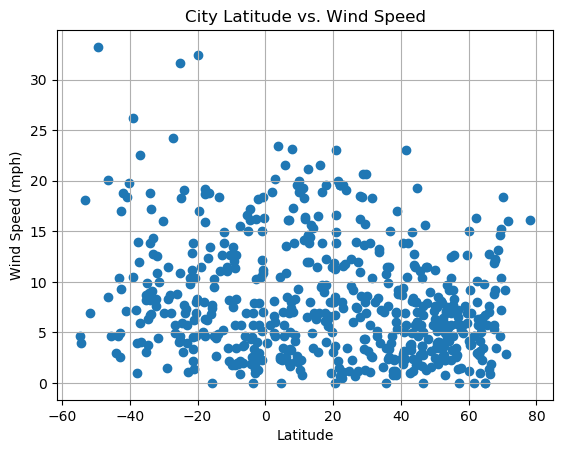

In [36]:
# Creating Scatter plot
plt.scatter(weather_data["lat"], weather_data["wind_speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('LatVsWind.png', dpi='figure', format='png')

## Explanation:
* This scatter plot displays a high density of wind speed between 0 to 15 mph, almost regardless of latitude. Interesting to notice that the highest wind speed values are not found near the equator, almost a valley-like plot in this regard.

## Linear Regression

In [13]:
# Creating the northern and southern hemisphere dataframes

n_weather_data = weather_data[weather_data['lat'] >= 0]

s_weather_data = weather_data[weather_data['lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

C:\Users\colmu\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


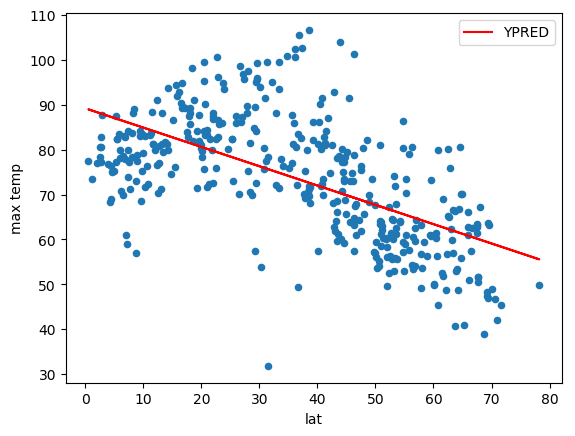

In [41]:
#Set x and y and reshape to np array
x = n_weather_data['lat'].values.reshape(-1, 1) 
y = n_weather_data['max temp'].values.reshape(-1, 1)

# Fit the Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
n_weather_data['YPRED'] = linear_regressor.predict(x)

# Plot the data
ax = n_weather_data.plot.scatter(x='lat', y='max temp')
n_weather_data.plot(x='lat', y='YPRED', color='red', ax=ax)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

C:\Users\colmu\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


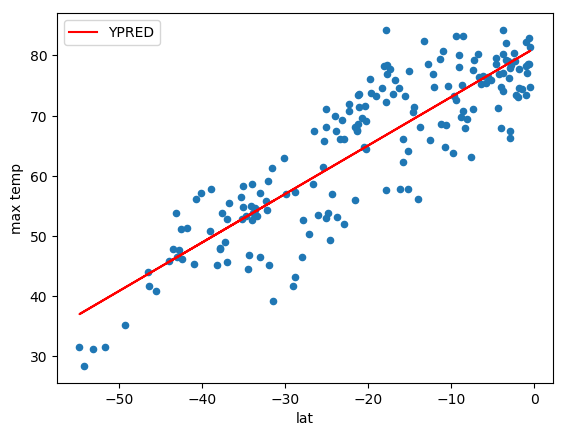

In [15]:
#Set x and y and reshape to np array
x = s_weather_data['lat'].values.reshape(-1, 1) 
y = s_weather_data['max temp'].values.reshape(-1, 1)

# Fit the Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
s_weather_data['YPRED'] = linear_regressor.predict(x)

# Plot the data
ax = s_weather_data.plot.scatter(x='lat', y='max temp')
s_weather_data.plot(x='lat', y='YPRED', color='red', ax=ax)

## Explanation:
* The linear regression on these scatter plots are exactly as expected from the previous horseshoe plot when they were combined. As cities get nearer the equator they present an average higher max temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

C:\Users\colmu\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


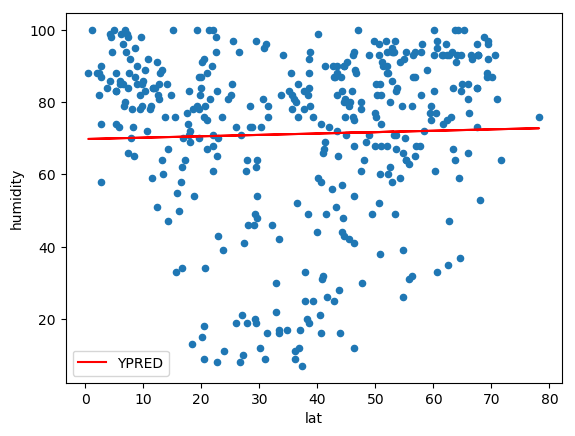

In [16]:
#Set x and y and reshape to np array
x = n_weather_data['lat'].values.reshape(-1, 1) 
y = n_weather_data['humidity'].values.reshape(-1, 1)

# Fit the Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
n_weather_data['YPRED'] = linear_regressor.predict(x)

# Plot the data
ax = n_weather_data.plot.scatter(x='lat', y='humidity')
n_weather_data.plot(x='lat', y='YPRED', color='red', ax=ax)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

C:\Users\colmu\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


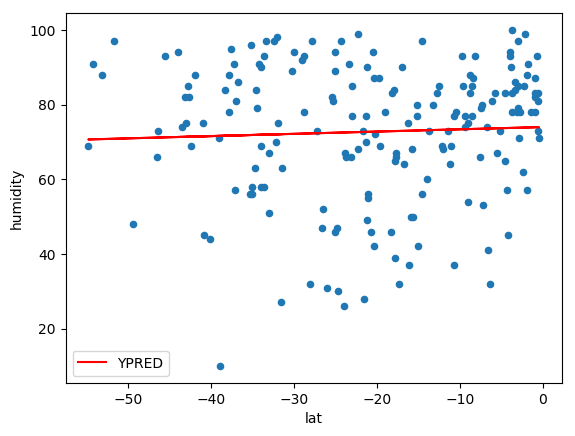

In [17]:
#Set x and y and reshape to np array
x = s_weather_data['lat'].values.reshape(-1, 1) 
y = s_weather_data['humidity'].values.reshape(-1, 1)

# Fit the Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
s_weather_data['YPRED'] = linear_regressor.predict(x)

# Plot the data
ax = s_weather_data.plot.scatter(x='lat', y='humidity')
s_weather_data.plot(x='lat', y='YPRED', color='red', ax=ax)

## Explanation:
* These regression lines demonstrate that humidity and Latitude are not highly correlated, and both hemispheres have an average ~70% humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

C:\Users\colmu\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


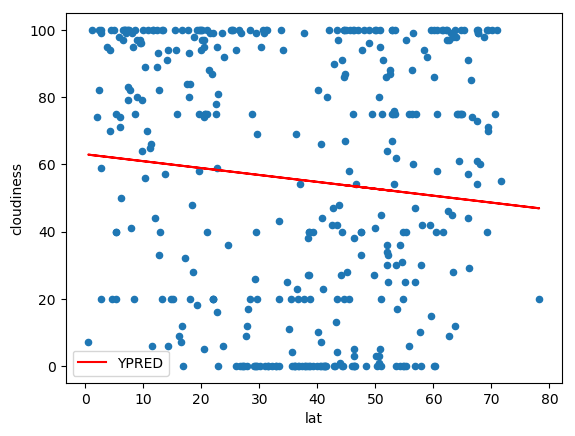

In [18]:
#Set x and y and reshape to np array
x = n_weather_data['lat'].values.reshape(-1, 1) 
y = n_weather_data['cloudiness'].values.reshape(-1, 1)

# Fit the Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
n_weather_data['YPRED'] = linear_regressor.predict(x)

# Plot the data
ax = n_weather_data.plot.scatter(x='lat', y='cloudiness')
n_weather_data.plot(x='lat', y='YPRED', color='red', ax=ax)

#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

C:\Users\colmu\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


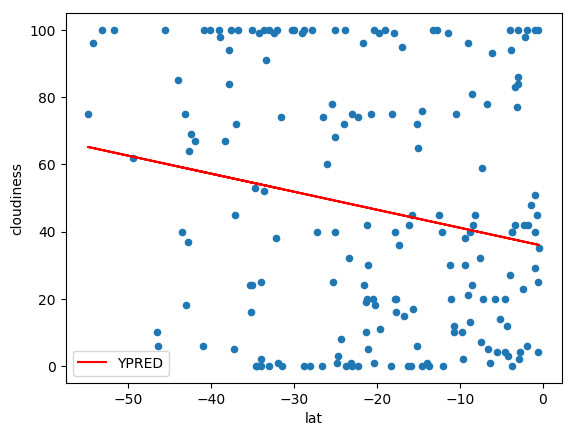

In [19]:
#Set x and y and reshape to np array
x = s_weather_data['lat'].values.reshape(-1, 1) 
y = s_weather_data['cloudiness'].values.reshape(-1, 1)

# Fit the Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
s_weather_data['YPRED'] = linear_regressor.predict(x)

# Plot the data
ax = s_weather_data.plot.scatter(x='lat', y='cloudiness')
s_weather_data.plot(x='lat', y='YPRED', color='red', ax=ax)

## Explanation:
* These regression lines interestingly from go from an average ~60% cloudiness on the left and then dropping ~10 to 20% on the right of the plot. It would be expected for the lines to meet at the equator, but that's not the case.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

C:\Users\colmu\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


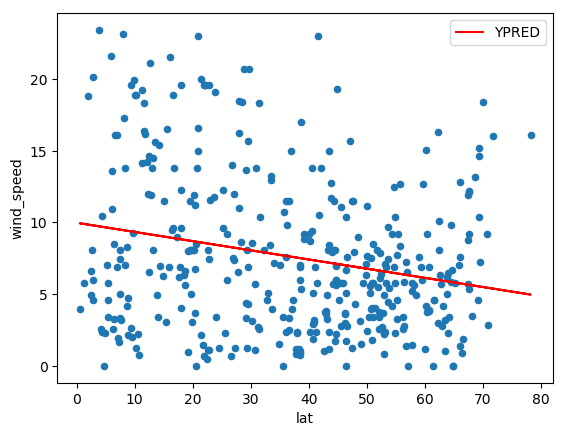

In [20]:
#Set x and y and reshape to np array
x = n_weather_data['lat'].values.reshape(-1, 1) 
y = n_weather_data['wind_speed'].values.reshape(-1, 1)

# Fit the Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
n_weather_data['YPRED'] = linear_regressor.predict(x)

# Plot the data
ax = n_weather_data.plot.scatter(x='lat', y='wind_speed')
n_weather_data.plot(x='lat', y='YPRED', color='red', ax=ax)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

C:\Users\colmu\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


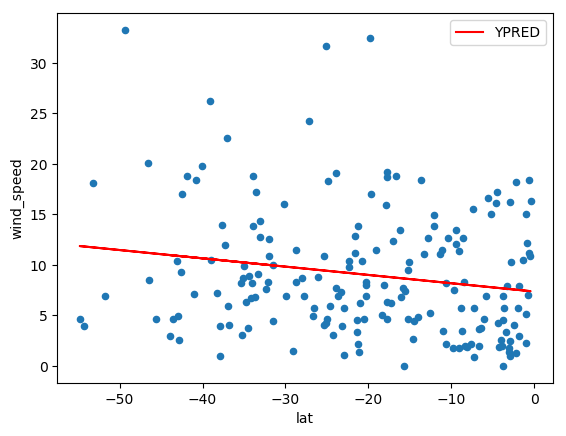

In [21]:
#Set x and y and reshape to np array
x = s_weather_data['lat'].values.reshape(-1, 1) 
y = s_weather_data['wind_speed'].values.reshape(-1, 1)

# Fit the Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
s_weather_data['YPRED'] = linear_regressor.predict(x)

# Plot the data
ax = s_weather_data.plot.scatter(x='lat', y='wind_speed')
s_weather_data.plot(x='lat', y='YPRED', color='red', ax=ax)

## Explanation:
* Like the cloudiness plots above, these regression lines demonstrate that wind_speed and Latitude are not highly correlated either, and they also have a rightward slope, regardless of the equator positioning.

In [26]:
# Writing data to a CSV
weather_data.to_csv('weather_data.csv')